<a href="https://colab.research.google.com/github/shgini27/deep-learning-lab/blob/master/Copy_of_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

## All the libraries used in this project is imported here.
##### Pandas     --->
##### Seaborn    --->
##### Numpy      --->
##### Sklearn    --->
##### Matplotlib --->
##### Missingo   --->
##### Train Test Split --->
##### Decision Tree Classifier --->
##### confusion matrix --->

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

### Reading csv file using pandas to get dataset, which loaded in to drive. Also describe datasets.

In [9]:
path = '/content/drive/MyDrive/datasets/employee_turnover_dataset.csv'
hr = pd.read_csv(path)
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename "sales" column to "department" and "time_spend_company" to "experience". After display columns.

In [10]:
hr = hr.rename(columns={'time_spend_company':'experience','Work_accident':'work_accident','sales':'department'})
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   experience             14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Converting "salary" and "department" column into numerical value so all columns will be similar.

In [11]:
hr['salary'] = hr['salary'].map({'low':0,'medium':1,'high':2}).astype(int)
hr['department'] = hr['department'].map({'sales':0,'accounting':1,'hr':2, 'technical':3, 'support':4, 'management':5, 'IT':6, 'product_mng':7, 'marketing':8, 'RandD':9}).astype(int)
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,experience,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


## Checking missing values from our dataset in bar chart form. As it seen from bar our dataset does not have missing values. Missingno library is used to show bar.

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
experience               False
work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

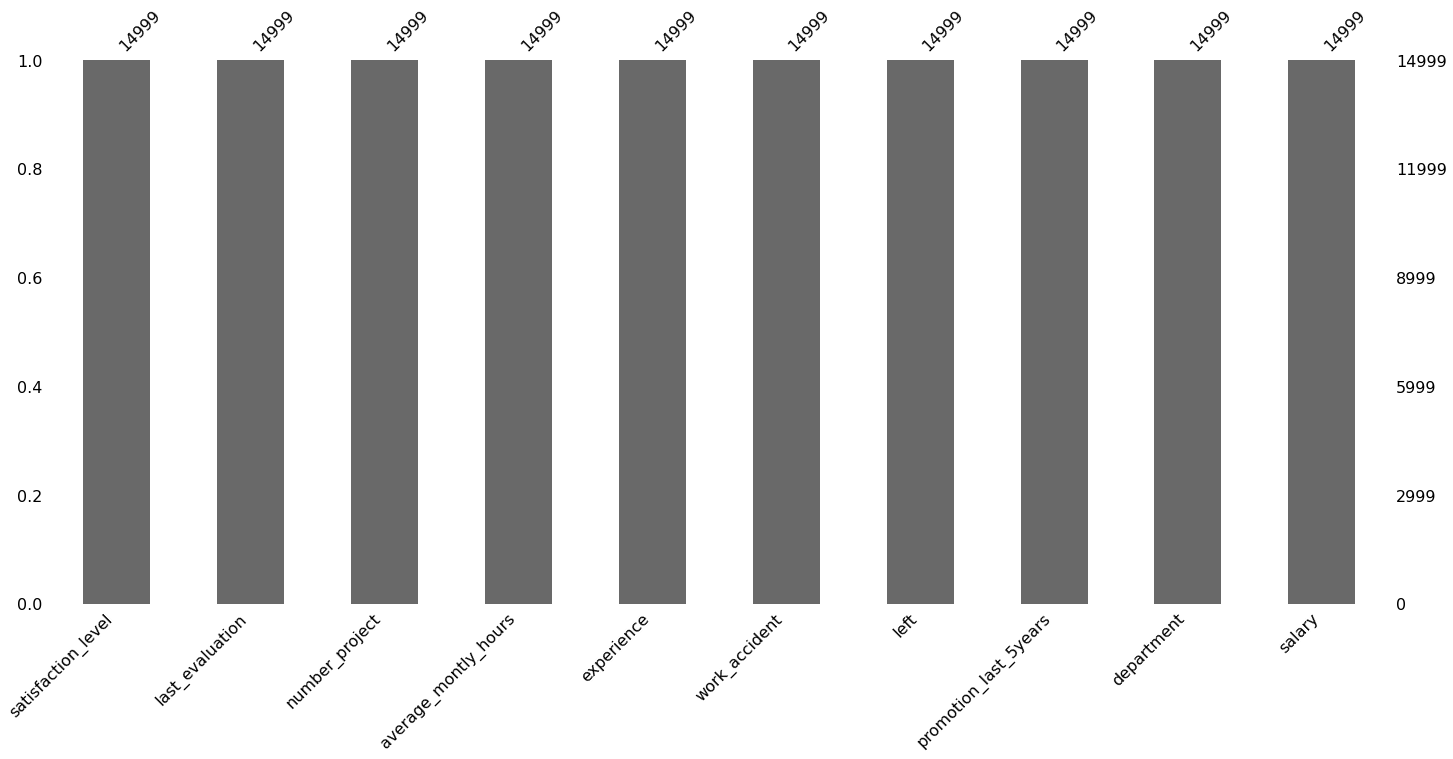

In [12]:
msno.bar(hr)
hr.isnull().any()

## Split data into train and test sets. 25% of data will be taken as test set.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(hr, hr['left'], test_size=.25)
x_train = x_train.drop('left', axis=1)
x_test = x_test.drop('left', axis=1)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(11249, 9) (11249,)
(3750, 9) (3750,)


## Decision Tree Classifier will be used to build model and accuracy will be printed using model.

In [14]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
accuracy_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
accuracy_decision_tree

97.68

## Random Forest is used to build model and accuracy is printed.

In [20]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
accuracy_rf = round(accuracy_score(y_test, rf.predict(x_test)) * 100, 2)
accuracy_rf

99.07

## Random Forest model predictions confusion matrix is calculated using sklearn metrics confusion matrix function.

In [21]:
confusion_matrix(y_test, rf.predict(x_test))

array([[2855,    5],
       [  30,  860]])

## As we see from accuracy results Random Forest shows is better results with 99.07%